#Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd #Menyimpan dataset dalam bentuk DataFrame
import numpy as np #Bekerja dengan array
import matplotlib.pyplot as plt #Visualisasi Data
import seaborn as sns #Visualisasi Data

#Input Data

In [3]:
#Membaca dataset csv yang dipisahkan oleh ; atau semicolon
df = pd.read_csv('./bank.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Dataset description

```
• age (numeric)
• job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
• marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
• education (categorical: "unknown","secondary","primary","tertiary")
• default: has credit in default? (binary: "yes","no")
• balance: average yearly balance, in euros (numeric) 
• housing: has housing loan? (binary: "yes","no")
• loan: has personal loan? (binary: "yes","no")
• contact: contact communication type (categorical: "unknown","telephone","cellular") 
• day: last contact day of the month (numeric)
• month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
• duration: last contact duration, in seconds (numeric)
• campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
• pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
• previous: number of contacts performed before this campaign and for this client (numeric)
• poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
• y - has the client subscribed a term deposit? (binary: "yes","no")
```

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


#Data Visualizations

no     4000
yes     521
Name: y, dtype: int64


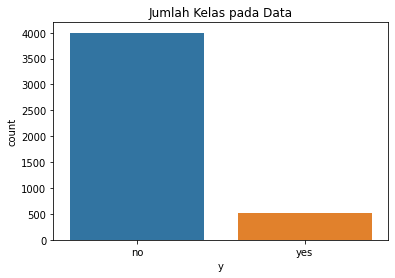

In [8]:
print(df['y'].value_counts())
sns.countplot(x='y', data=df)
plt.title('Jumlah Kelas pada Data')
plt.show()

Data yang kita memiliki tidak seimbang, dimana untuk kelas tidak deposit (no) memiliki jumlah yang sangat banyak jika dibandingkan dengan kelas deposit (yes)

In [9]:
def obj_plot(x, df):
  plt.figure(figsize = (15, 7))
  sns.countplot(x=x, hue='y', data=df)
  plt.title('Distribusi dari {} terhadap Data'.format(x))
  plt.show()

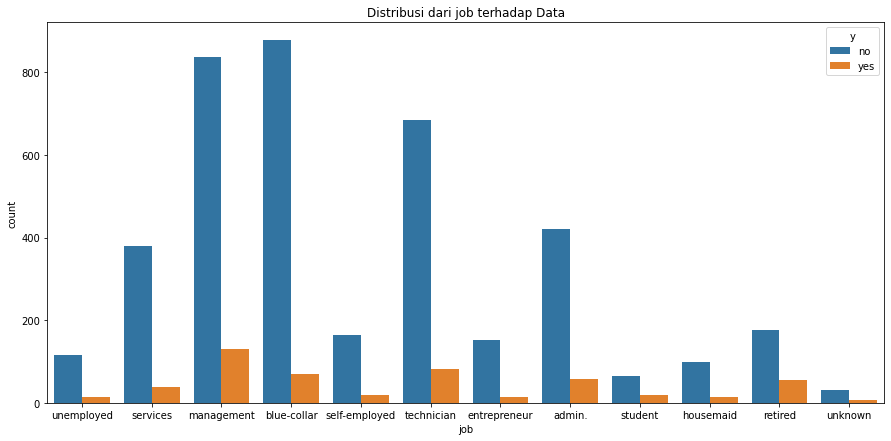

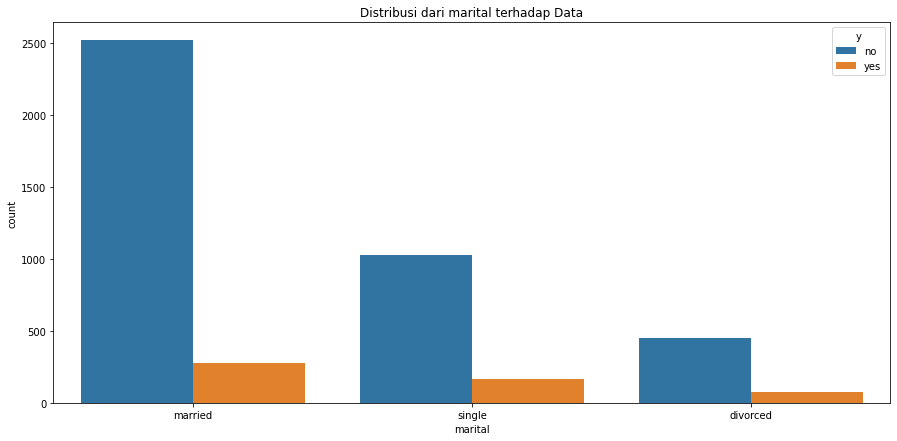

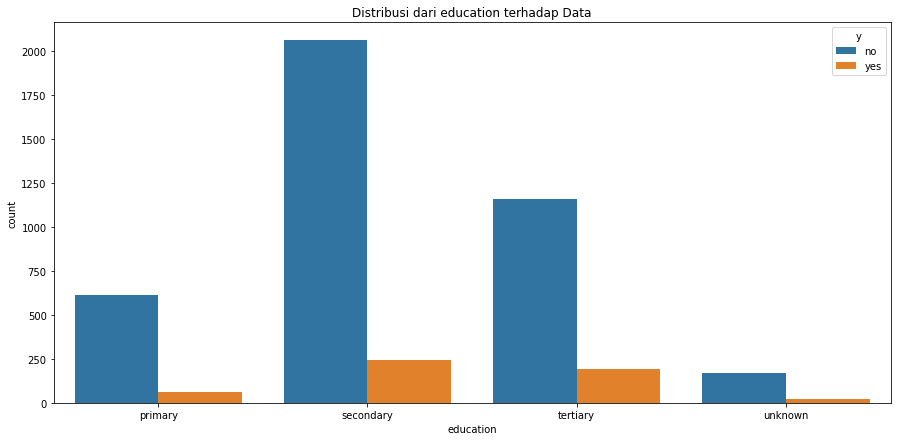

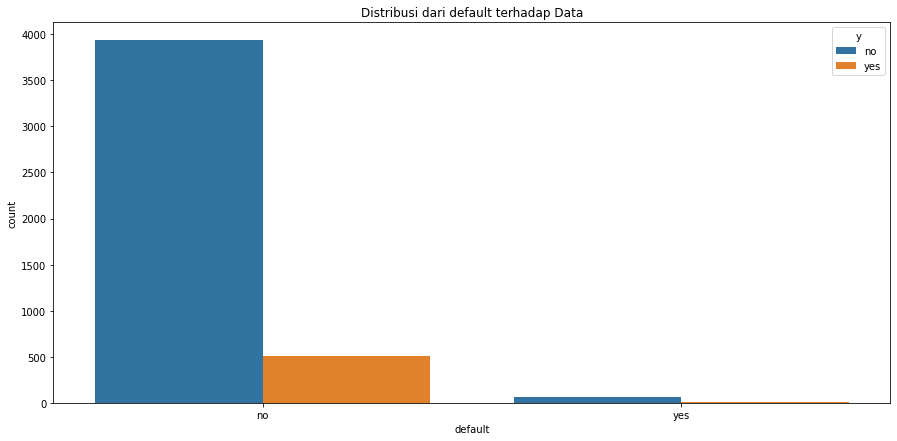

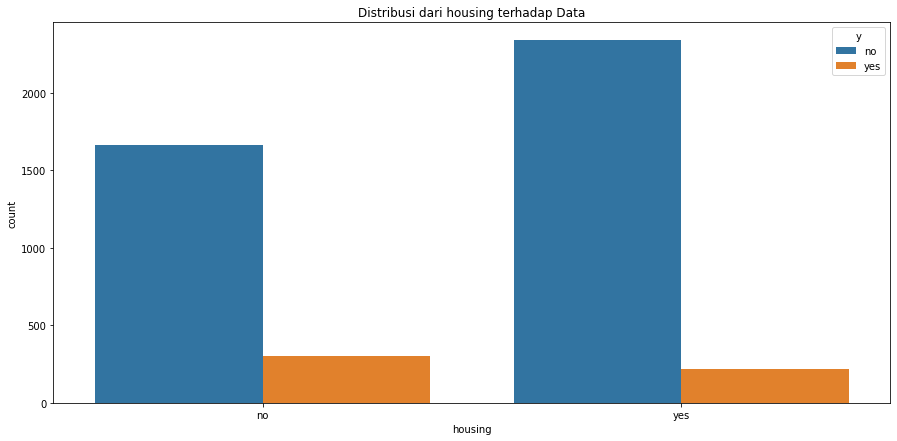

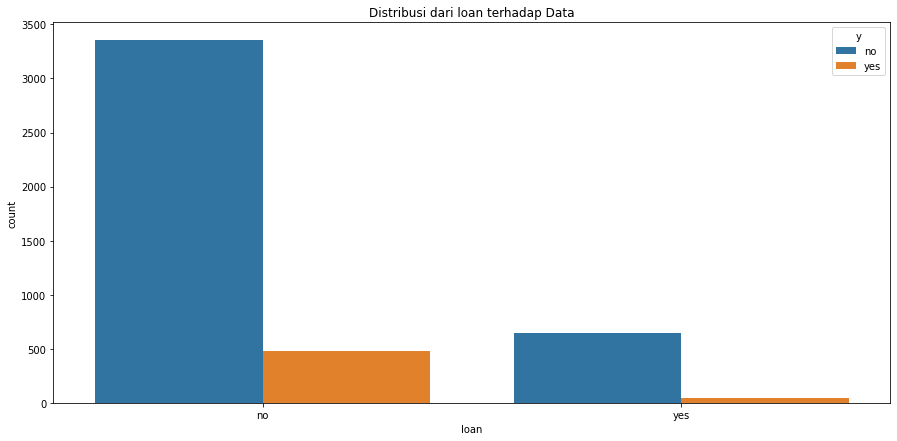

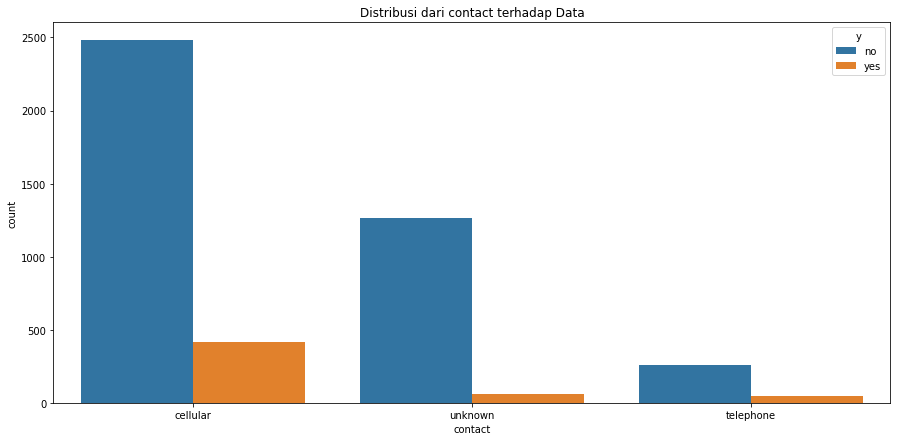

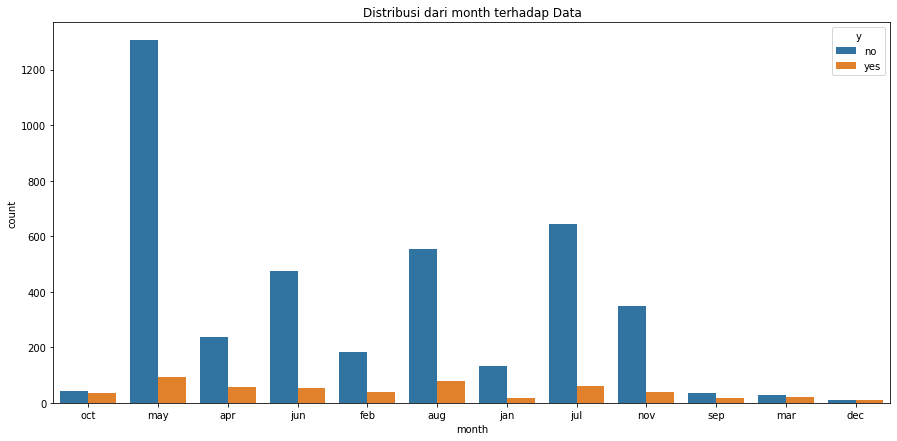

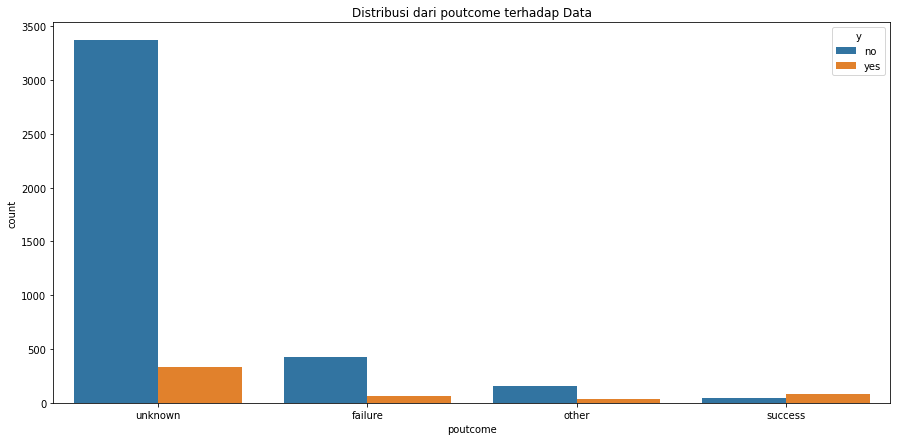

In [10]:
for col in df.select_dtypes(include='object').columns[:-1]:
  obj_plot(str(col), df)

In [11]:
def plot(x, df):
  plt.figure(figsize = (15, 7))
  sns.boxplot(x='y', y=x, data=df)
  plt.title('Persebaran dari {} terhadap data'.format(x))
  plt.show()

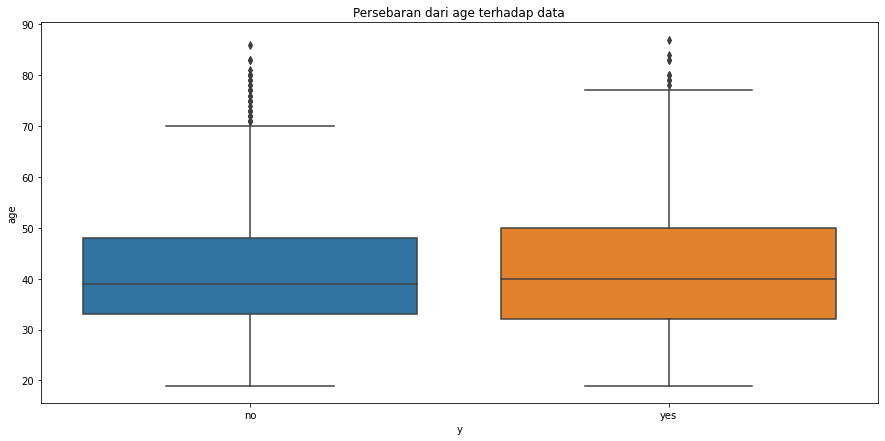

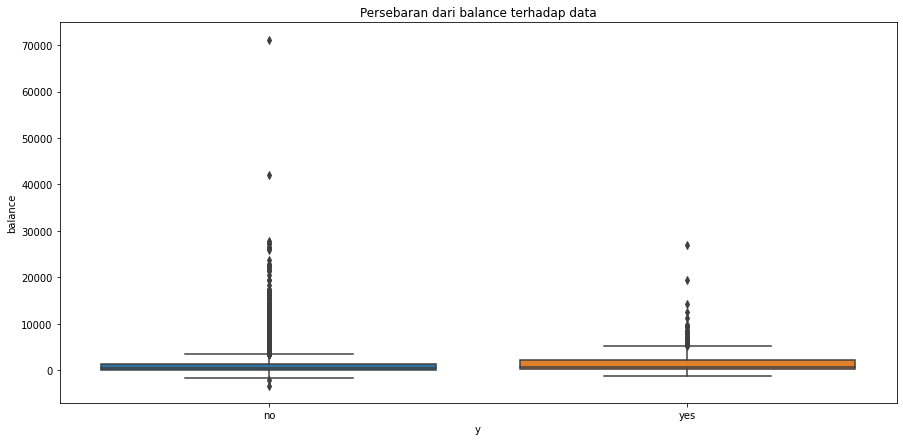

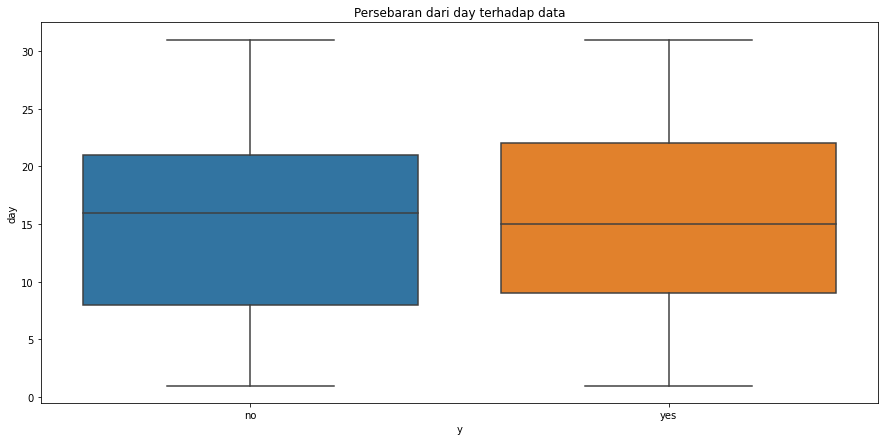

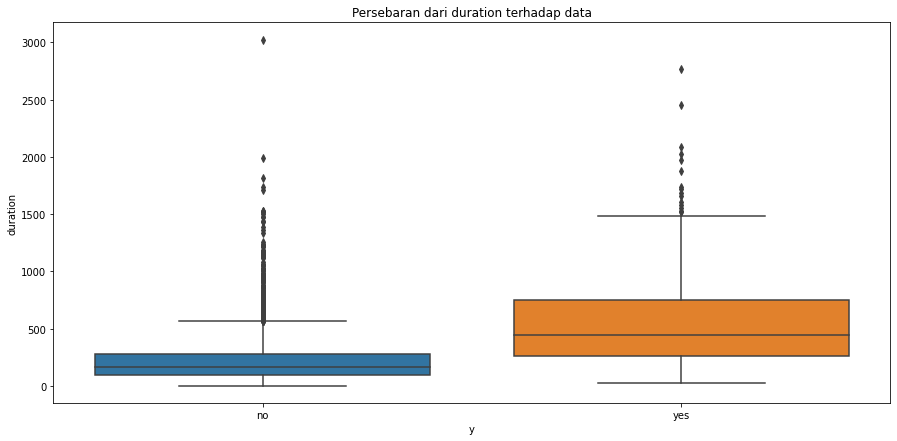

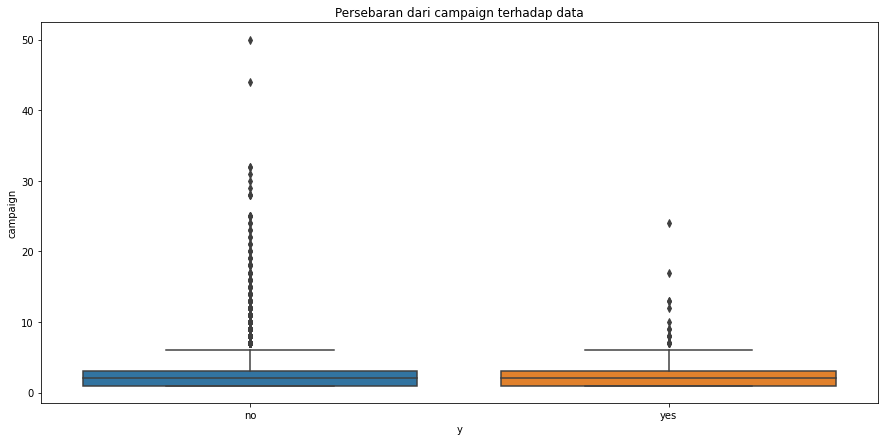

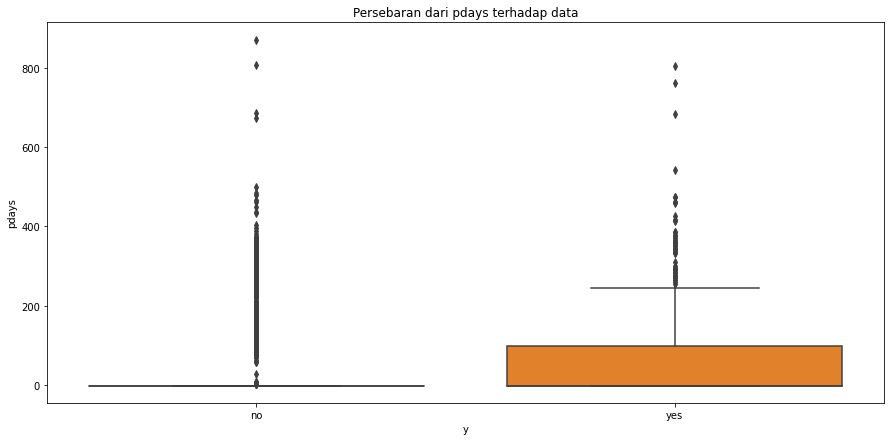

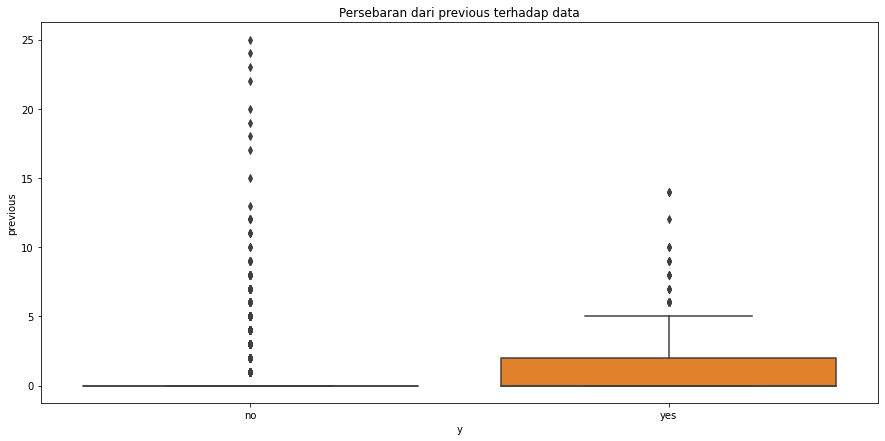

In [12]:
for col in df.select_dtypes(include=['int','float']).columns:
  plot(str(col),df)

Seperti yang dapat dilihat pada boxplot diatas, terdapat banyak outlier pada data kita

#Data Preprocessing

##Label Encoder

**LabelEncoder** can be used to normalize labels.  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [13]:
#Binary
def biner(x):
  if x == 'no':
    return 0
  else:
    return 1

df2 = df.copy()
col_biner = ['default','housing','loan','y']
for col in col_biner:
  df2[col] = df2[col].apply(biner)

df2.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0


In [14]:
#Multi Categorical
from sklearn.preprocessing import LabelEncoder

label_job = LabelEncoder().fit(df2['job'])
label_marital = LabelEncoder().fit(df2['marital'])
label_edu = LabelEncoder().fit(df['education'])
label_contact = LabelEncoder().fit(df['contact'])
label_month = LabelEncoder().fit(df['month'])
label_pout = LabelEncoder().fit(df['poutcome'])

df2['job'] = label_job.transform(df2['job'])
df2['marital'] = label_marital.transform(df2['marital'])
df2['education'] = label_edu.transform(df2['education'])
df2['contact'] = label_contact.transform(df2['contact'])
df2['month'] = label_month.transform(df2['month'])
df2['poutcome'] = label_pout.transform(df2['poutcome'])

df2.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0


In [15]:
label_job.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [16]:
for i in range(len(label_job.classes_)):
  print(i, '->', label_job.classes_[i])

0 -> admin.
1 -> blue-collar
2 -> entrepreneur
3 -> housemaid
4 -> management
5 -> retired
6 -> self-employed
7 -> services
8 -> student
9 -> technician
10 -> unemployed
11 -> unknown


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [18]:
df2.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,1.231365,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,5.540146,263.961292,2.793630,39.766645,0.542579,2.559168,0.115240
std,10.576211,3.255716,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


##Remove Outliers
Pertama-tama akan dipisahkan data dengan label y = 0 dan 1

In [19]:
depo_no = df2[df2['y'] == 0]
depo_no

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [20]:
depo_yes = df2[df2['y'] == 1]
depo_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,8,2,1,0,502,0,0,0,30,0,261,1,-1,0,3,1
30,68,5,0,1,0,4189,0,0,1,14,5,897,2,-1,0,3,1
33,32,4,2,2,0,2536,1,0,0,26,1,958,6,-1,0,3,1
34,49,9,1,2,0,1235,0,0,0,13,1,354,3,-1,0,3,1
36,78,5,0,0,0,229,0,0,1,22,10,97,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,9,2,1,0,668,1,0,2,28,8,576,3,-1,0,3,1
4503,60,6,1,0,0,362,0,1,0,29,5,816,6,-1,0,3,1
4504,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0,1
4505,32,0,2,1,0,620,1,0,2,26,8,1234,3,-1,0,3,1


In [21]:
def Outdet(df, col):
    Q1=df[col].quantile(0.25) #Kuartil 1 (25%)
    Q3=df[col].quantile(0.75) #Kuartil 3 (75%)

    IQR=Q3-Q1 #Selisih antara Q3 dengan Q1

    LR=Q1-(IQR*1.5) #Batas Bawah
    
    UR=Q3+(IQR*1.5) #Batas Atas

    df = df[(df[col] > LR) & (df[col] < UR)]
    return df

In [22]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [23]:
#Untuk label tidak deposit
print('Before : {}'.format(depo_no.shape[0]))

columns = ['age', 'balance', 'day', 'duration', 'campaign']
for col in columns:
  depo_no = Outdet(depo_no, col)
  print('After Removing in {} : {}'.format(col, depo_no.shape[0]))
  
depo_no

Before : 4000
After Removing in age : 3970
After Removing in balance : 3513
After Removing in day : 3513
After Removing in duration : 3274
After Removing in campaign : 2908


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,1,1,1,0,322,0,0,0,14,1,356,2,-1,0,3,0
4514,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0,0
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [24]:
#Untuk label deposit
print('Before : {}'.format(depo_yes.shape[0]))

columns = ['age', 'balance', 'day', 'duration', 'campaign']
for col in columns:
  depo_yes = Outdet(depo_yes, col)
  print('After Removing in {} : {}'.format(col, depo_yes.shape[0]))
  
depo_yes

Before : 521
After Removing in age : 509
After Removing in balance : 482
After Removing in day : 482
After Removing in duration : 467
After Removing in campaign : 435


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,8,2,1,0,502,0,0,0,30,0,261,1,-1,0,3,1
30,68,5,0,1,0,4189,0,0,1,14,5,897,2,-1,0,3,1
34,49,9,1,2,0,1235,0,0,0,13,1,354,3,-1,0,3,1
37,32,1,1,1,0,2089,1,0,0,14,9,132,1,-1,0,3,1
38,33,4,1,1,0,3935,1,0,0,6,8,765,1,342,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484,38,4,1,2,0,3436,0,0,0,21,9,663,4,-1,0,3,1
4494,26,9,2,1,0,668,1,0,2,28,8,576,3,-1,0,3,1
4504,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0,1
4505,32,0,2,1,0,620,1,0,2,26,8,1234,3,-1,0,3,1


In [25]:
df3 = pd.concat([depo_no, depo_yes],axis=0, ignore_index=True)
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
2,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
3,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
4,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,38,4,1,2,0,3436,0,0,0,21,9,663,4,-1,0,3,1
3339,26,9,2,1,0,668,1,0,2,28,8,576,3,-1,0,3,1
3340,42,1,2,1,0,1080,1,1,0,13,8,951,3,370,4,0,1
3341,32,0,2,1,0,620,1,0,2,26,8,1234,3,-1,0,3,1


In [26]:
df3['y'].value_counts()

0    2908
1     435
Name: y, dtype: int64

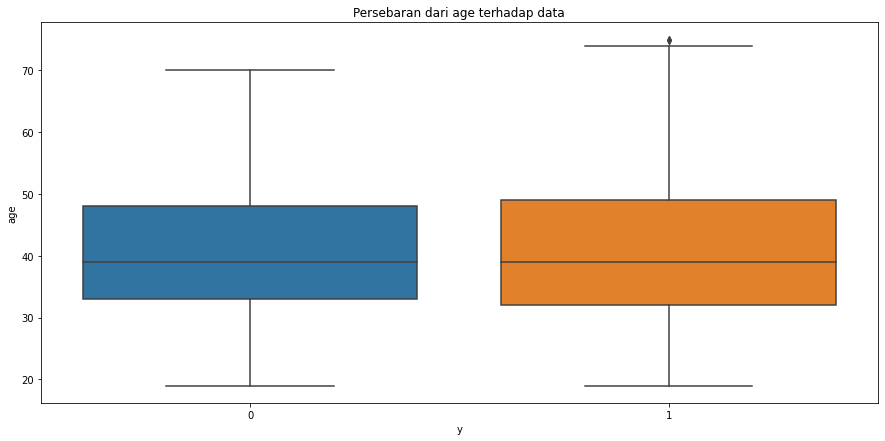

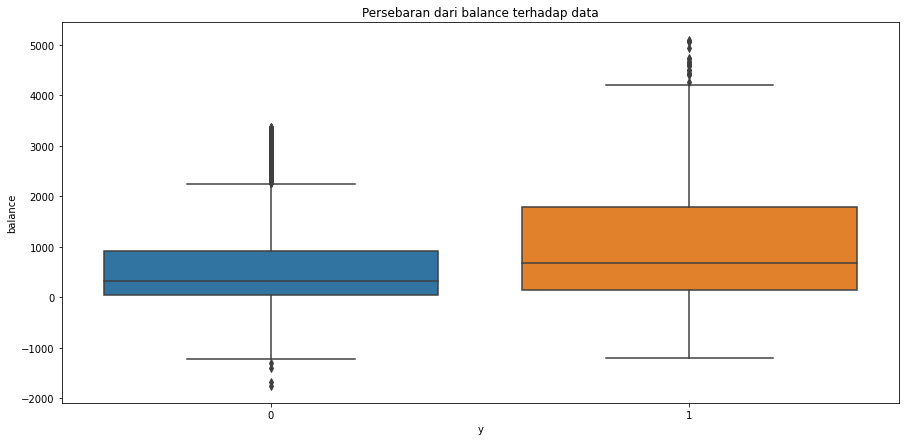

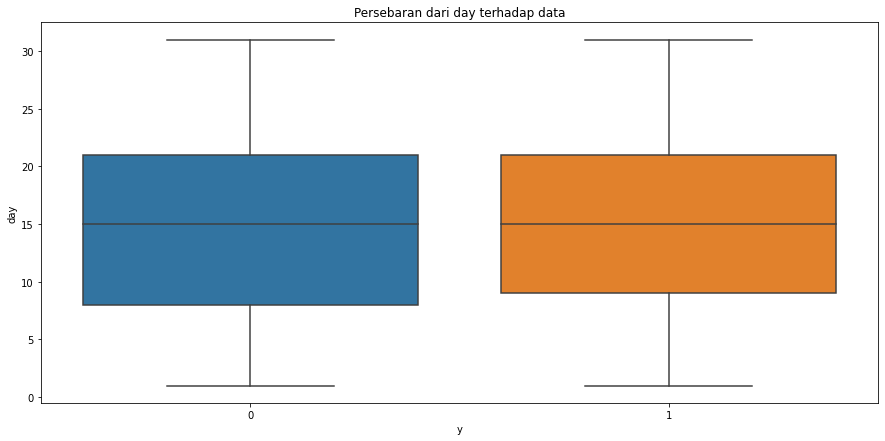

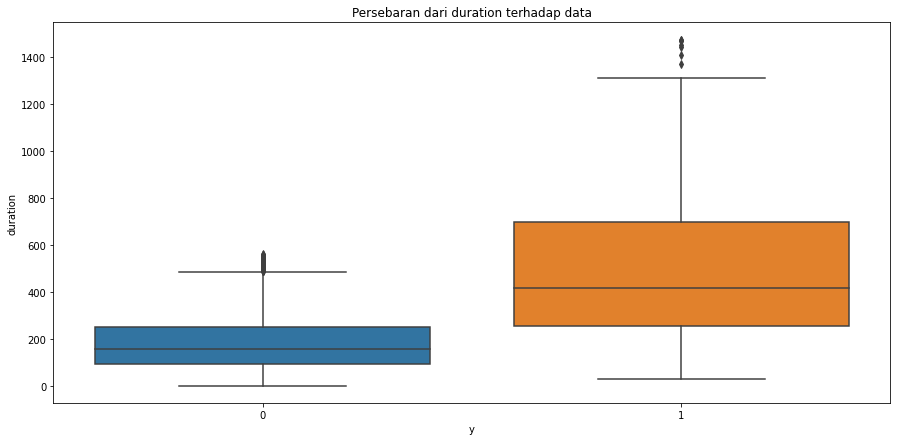

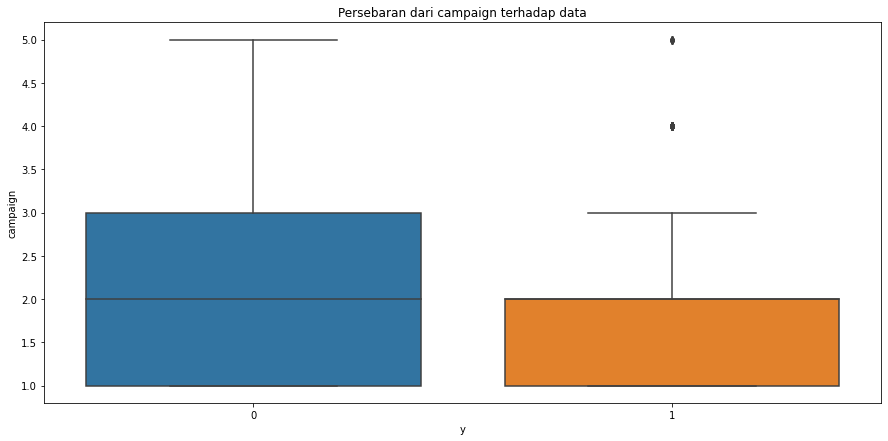

In [28]:
for col in columns:
  plot(str(col),df3)

##Matrix Colleration

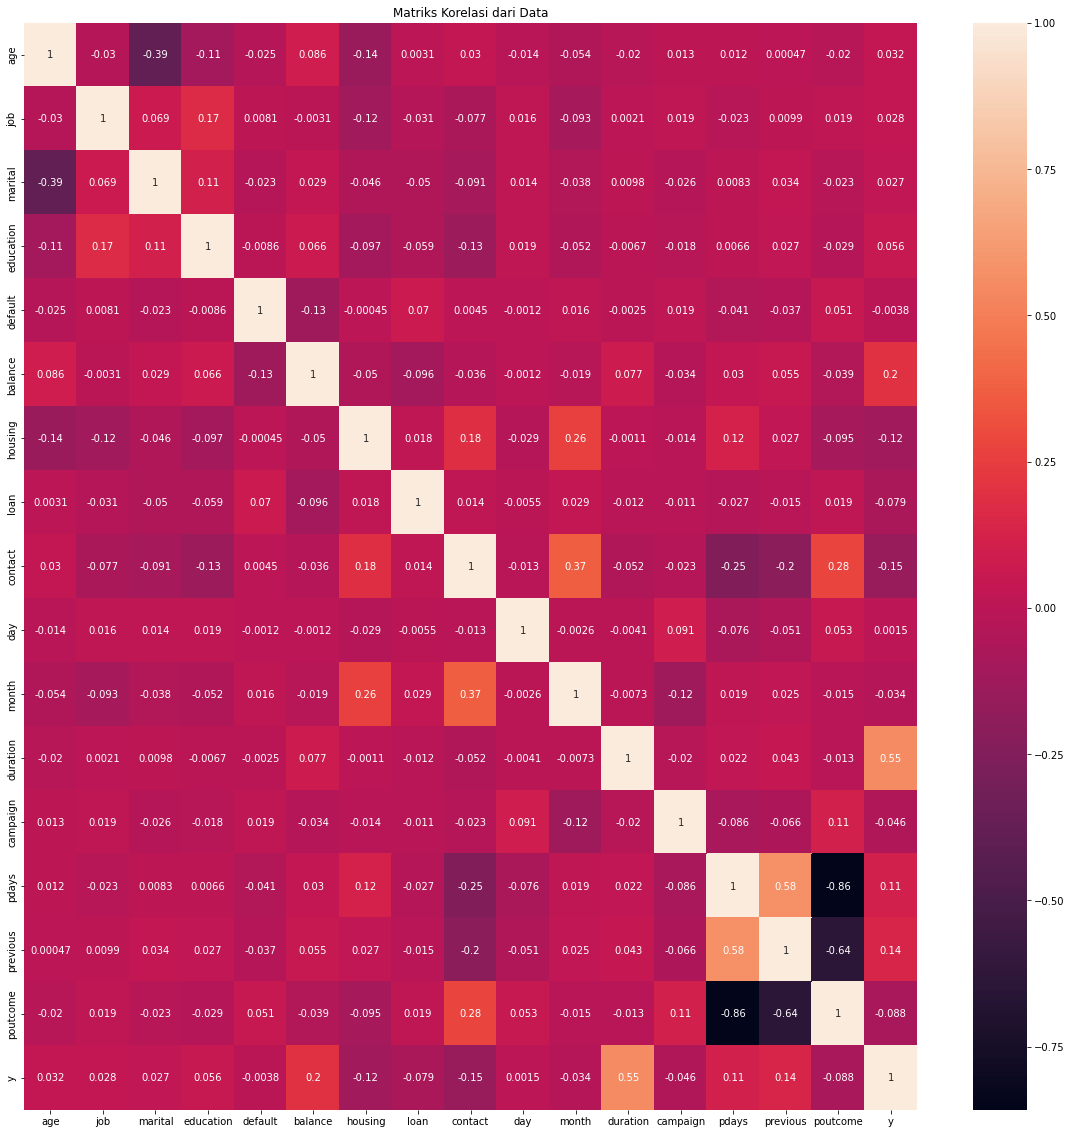

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),annot =True)
plt.title('Matriks Korelasi dari Data')
plt.show()

In [30]:
#kolom dengan korelasi yang tinggi hanya
high_cor = ['balance', 'housing', 'contact',
            'duration', 'pdays', 'previous']

In [ ]:
high_cor

['balance', 'housing', 'contact', 'duration', 'pdays', 'previous']

##Balancing Data

In [31]:
X = df3[high_cor]
X.head()

,balance,housing,contact,duration,pdays,previous
0,1787,0,0,79,-1,0
1,1350,1,0,185,330,1
2,1476,1,2,199,-1,0
3,0,1,2,226,-1,0
4,747,0,0,141,176,3


In [32]:
y = df3['y'].values
y[:5]

array([0, 0, 0, 0, 0])

In [33]:
from imblearn.over_sampling import SMOTE #Oversample

from collections import Counter

oversample = SMOTE()
print(Counter(y))

X, y = oversample.fit_resample(X,y)
print(Counter(y))

Counter({0: 2908, 1: 435})
Counter({0: 2908, 1: 2908})


##Splitting Data

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

print('Training Shape  = ',X_train.shape, y_train.shape)
print('Training Target = ' ,Counter(y_train))
print('============================================')
print('Testing Shape   = ',X_test.shape, y_test.shape)
print('Testing Target  = ' ,Counter(y_test))

Training Shape  =  (4652, 6) (4652,)
Training Target =  Counter({1: 2348, 0: 2304})
Testing Shape   =  (1164, 6) (1164,)
Testing Target  =  Counter({0: 604, 1: 560})


In [ ]:
X_train.describe()

,balance,housing,contact,duration,pdays,previous
count,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000
mean,882.933147,0.407782,0.422184,339.712382,53.549011,0.725064
std,1144.883814,0.491475,0.770175,273.469322,105.858656,1.628160
min,-1400.000000,0.000000,0.000000,4.000000,-1.000000,0.000000
25%,85.000000,0.000000,0.000000,143.000000,-1.000000,0.000000
50%,462.000000,0.000000,0.000000,253.000000,-1.000000,0.000000
75%,1275.250000,1.000000,0.000000,448.250000,69.250000,1.000000
max,5106.000000,1.000000,2.000000,1473.000000,808.000000,19.000000


In [ ]:
X_test.describe()

,balance,housing,contact,duration,pdays,previous
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,0.341227,0.432990,0.222079,0.230534,0.069182,0.042006
std,0.167932,0.495702,0.390496,0.187356,0.138539,0.103937
min,-0.053182,0.000000,0.000000,0.002723,0.000000,0.000000
25%,0.224255,0.000000,0.000000,0.097345,0.000000,0.000000
50%,0.284122,0.000000,0.000000,0.172907,0.000000,0.000000
75%,0.391831,1.000000,0.500000,0.302417,0.088072,0.052632
max,0.999539,1.000000,1.000000,0.999319,1.077874,1.263158


##Normalize Data

In [35]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train[X_train.columns] = scale.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scale.transform(X_test[X_test.columns])

In [36]:
X_train.head()

,balance,housing,contact,duration,pdays,previous
5283,0.677067,0.0,0.0,0.300885,0.113721,0.052632
5628,0.183215,1.0,0.0,0.265487,0.000000,0.000000
26,0.221642,0.0,0.0,0.024506,0.000000,0.000000
2887,0.251768,1.0,0.0,0.159292,0.447466,0.263158
4511,0.305564,0.0,0.0,0.592240,0.000000,0.000000


In [ ]:
X_train.describe()

,balance,housing,contact,duration,pdays,previous
count,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000
mean,0.350897,0.407782,0.211092,0.228531,0.067428,0.038161
std,0.175974,0.491475,0.385087,0.186160,0.130851,0.085693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228251,0.000000,0.000000,0.094622,0.000000,0.000000
50%,0.286197,0.000000,0.000000,0.169503,0.000000,0.000000
75%,0.411197,1.000000,0.000000,0.302417,0.086836,0.052632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test.head()

#Model

##Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_lr = lr.predict(X_test)
print(y_lr[:5])
print(y_test[:5])

[0 1 1 1 1]
[0 1 1 0 0]


In [39]:
lr.score(X_test, y_test)

0.8470790378006873

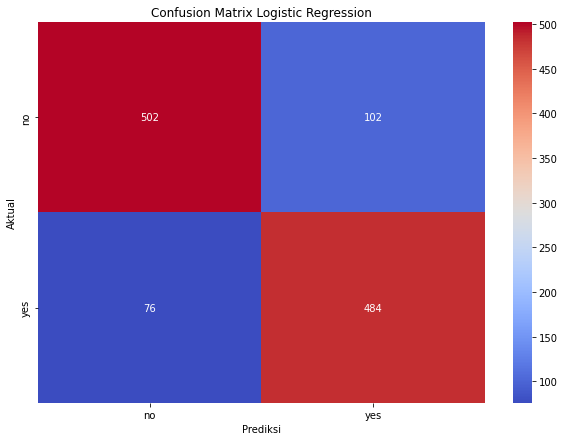

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_lr)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       604
           1       0.83      0.86      0.84       560

    accuracy                           0.85      1164
   macro avg       0.85      0.85      0.85      1164
weighted avg       0.85      0.85      0.85      1164



##K Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
y_knn = knn.predict(X_test)
print(y_knn[:5])
print(y_test[:5])

[0 1 1 1 1]
[0 1 1 0 0]


In [44]:
knn.score(X_test, y_test)

0.8865979381443299

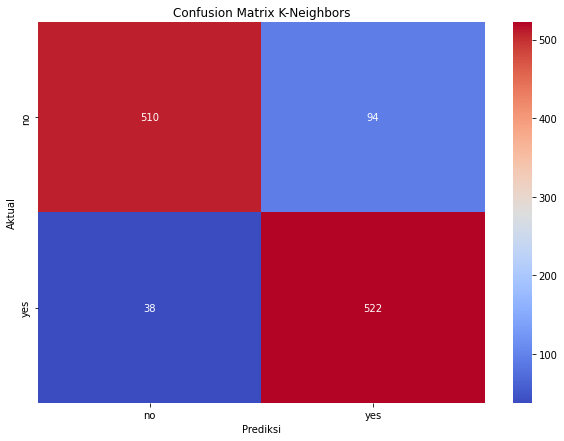

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_knn)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix K-Neighbors')
plt.show()

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       604
           1       0.85      0.93      0.89       560

    accuracy                           0.89      1164
   macro avg       0.89      0.89      0.89      1164
weighted avg       0.89      0.89      0.89      1164



##Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [48]:
y_nb = nb.predict(X_test)
print(y_nb[:5])
print(y_test[:5])

[0 1 1 1 1]
[0 1 1 0 0]


In [49]:
nb.score(X_test, y_test)

0.8273195876288659

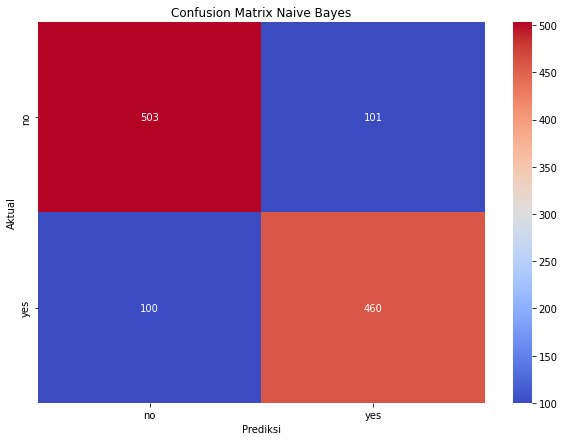

In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_nb)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       604
           1       0.82      0.82      0.82       560

    accuracy                           0.83      1164
   macro avg       0.83      0.83      0.83      1164
weighted avg       0.83      0.83      0.83      1164



##Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=150)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=150)

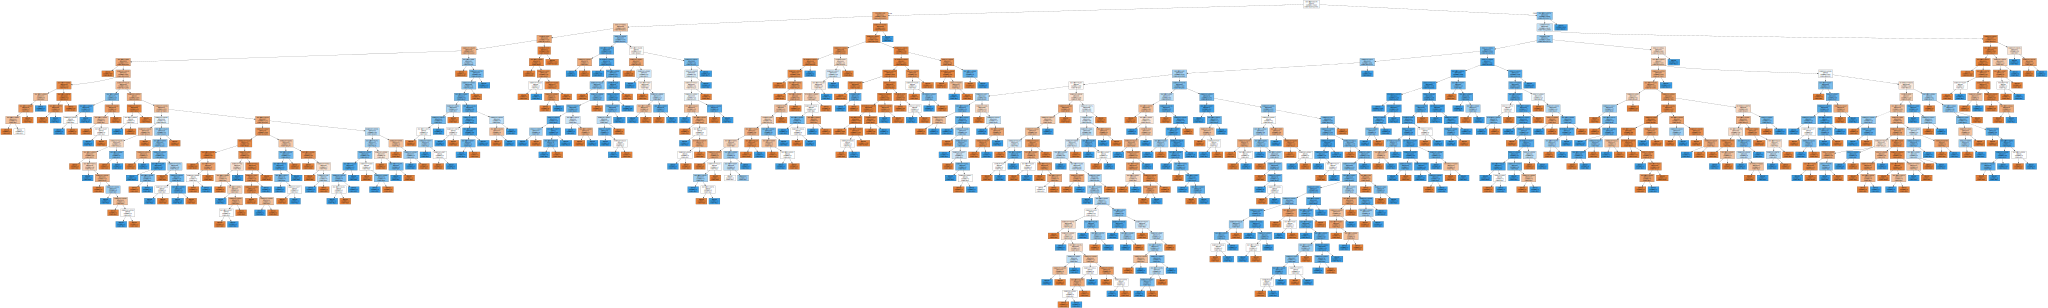

In [53]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

In [54]:
graph.render("Decision Tree")

'Decision Tree.png'

In [55]:
y_dt = dt.predict(X_test)
print(y_dt[:5])
print(y_test[:5])

[0 1 1 1 0]
[0 1 1 0 0]


In [56]:
dt.score(X_test, y_test)

0.8917525773195877

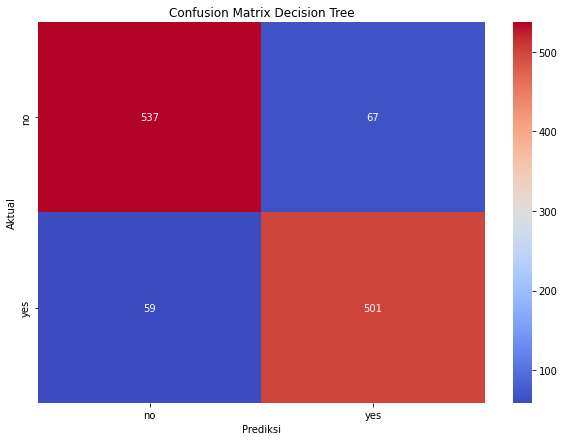

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_dt)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       604
           1       0.88      0.89      0.89       560

    accuracy                           0.89      1164
   macro avg       0.89      0.89      0.89      1164
weighted avg       0.89      0.89      0.89      1164



##Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,
                            max_depth=200)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=200, n_estimators=20)

In [60]:
y_rf = rf.predict(X_test)
print(y_rf[:5])
print(y_test[:5])

[0 1 1 1 1]
[0 1 1 0 0]


In [61]:
rf.score(X_test, y_test)

0.9140893470790378

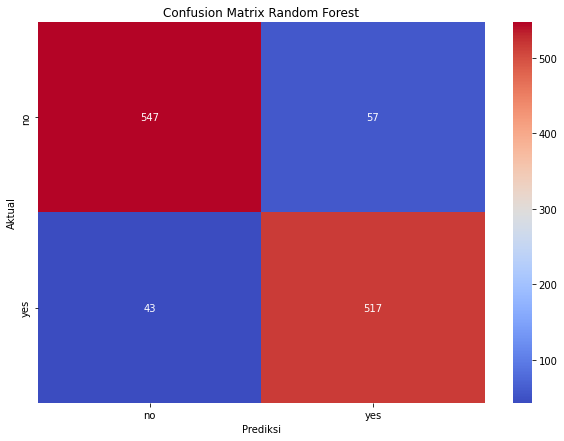

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_rf)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       604
           1       0.90      0.92      0.91       560

    accuracy                           0.91      1164
   macro avg       0.91      0.91      0.91      1164
weighted avg       0.91      0.91      0.91      1164



##DNN

In [64]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(64, input_shape=(X.shape[1],))) #Input Layer + Hidden Layer 1
model.add(keras.layers.Dense(128, activation='relu')) #Hidden Layer 2
model.add(keras.layers.Dense(256, activation='relu')) #Hidden Layer 3
model.add(keras.layers.Dense(256, activation='relu')) #Hidden Layer 4
model.add(keras.layers.Dense(128, activation='relu')) #Hidden Layer 5
model.add(keras.layers.Dense(64, activation='relu')) #Hidden Layer 6
model.add(keras.layers.Dense(1, activation='sigmoid')) #Output Layer

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 6

In [66]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs = 100,
                    shuffle=True)

Epoch 1/100
117/117 [==============================] - 2s 7ms/step - loss: 0.3910 - accuracy: 0.8253 - val_loss: 0.3650 - val_accuracy: 0.8367
Epoch 2/100
117/117 [==============================] - 1s 6ms/step - loss: 0.3365 - accuracy: 0.8562 - val_loss: 0.3706 - val_accuracy: 0.8303
Epoch 3/100
117/117 [==============================] - 1s 7ms/step - loss: 0.3363 - accuracy: 0.8530 - val_loss: 0.3599 - val_accuracy: 0.8421
Epoch 4/100
117/117 [==============================] - 1s 5ms/step - loss: 0.3194 - accuracy: 0.8619 - val_loss: 0.3868 - val_accuracy: 0.8314
Epoch 5/100
117/117 [==============================] - 1s 5ms/step - loss: 0.3223 - accuracy: 0.8560 - val_loss: 0.4283 - val_accuracy: 0.8174
Epoch 6/100
117/117 [==============================] - 1s 4ms/step - loss: 0.3173 - accuracy: 0.8611 - val_loss: 0.3468 - val_accuracy: 0.8432
Epoch 7/100
117/117 [==============================] - 1s 4ms/step - loss: 0.3095 - accuracy: 0.8627 - val_loss: 0.3445 - val_accuracy: 0.8496

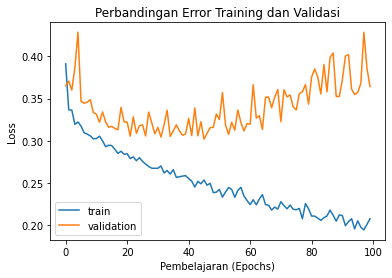

In [68]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Perbandingan Error Training dan Validasi')
plt.ylabel('Loss')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

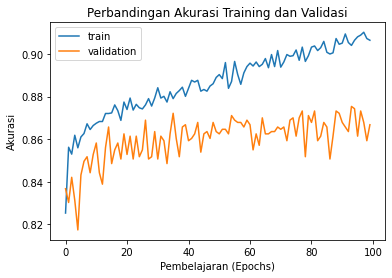

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Perbandingan Akurasi Training dan Validasi')
plt.ylabel('Akurasi')
plt.xlabel('Pembelajaran (Epochs)')
plt.legend()
plt.show()

In [70]:
y_dnn = model.predict(X_test)
y_dnn[:5]

array([[1.8519163e-04],
       [9.9866706e-01],
       [7.8280938e-01],
       [6.4435297e-01],
       [6.2628865e-01]], dtype=float32)

In [71]:
model.evaluate(X_test,y_test)

37/37 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8797


[0.3143479526042938, 0.8797250986099243]

In [78]:
yfinal_dnn = np.where((y_dnn >= 0.6), 1, y_dnn) #Jika dapat kemungkinan 60% ingin deposit, diklasifikasikan sbg deposit
yfinal_dnn = np.where((yfinal_dnn < 0.6), 0, yfinal_dnn) #dibawah 60%, diklasifikasikan sbg tidak deposit
yfinal_dnn[:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [79]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, yfinal_dnn))

0.8831615120274914


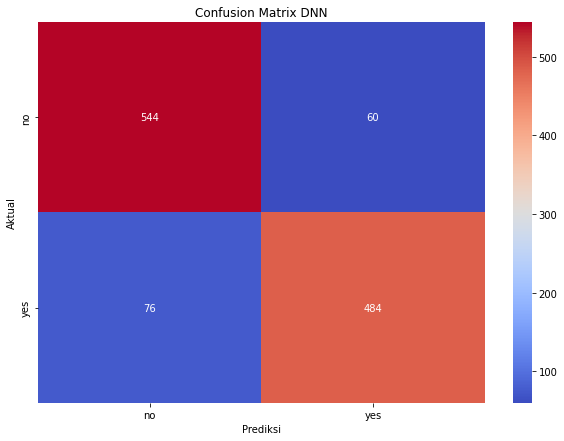

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,yfinal_dnn)

plt.figure(figsize = (10, 7))
sns.heatmap(cm,annot=True,cmap='coolwarm',fmt='g')
plt.xticks([0.5, 1.5],['no','yes'])
plt.yticks([0.5, 1.5],['no','yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix DNN')
plt.show()

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test,yfinal_dnn))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       604
           1       0.89      0.86      0.88       560

    accuracy                           0.88      1164
   macro avg       0.88      0.88      0.88      1164
weighted avg       0.88      0.88      0.88      1164



#Perbandingan Model

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('----------Accuracy----------')
print('Logistic Regression : {:.2f}%'.format(accuracy_score(y_test, y_lr)*100))
print('K-Neighbors         : {:.2f}%'.format(accuracy_score(y_test, y_knn)*100))
print('Naive Bayes         : {:.2f}%'.format(accuracy_score(y_test, y_nb)*100))
print('Decision Tree       : {:.2f}%'.format(accuracy_score(y_test, y_dt)*100))
print('Random Forest       : {:.2f}%'.format(accuracy_score(y_test, y_rf)*100))
print('Deep Neural Network : {:.2f}%'.format(accuracy_score(y_test, yfinal_dnn)*100))

print('============================')
print('============================')

print('---------Precision----------')
print('Logistic Regression : {:.2f}%'.format(precision_score(y_test, y_lr)*100))
print('K-Neighbors         : {:.2f}%'.format(precision_score(y_test, y_knn)*100))
print('Naive Bayes         : {:.2f}%'.format(precision_score(y_test, y_nb)*100))
print('Decision Tree       : {:.2f}%'.format(precision_score(y_test, y_dt)*100))
print('Random Forest       : {:.2f}%'.format(precision_score(y_test, y_rf)*100))
print('Deep Neural Network : {:.2f}%'.format(precision_score(y_test, yfinal_dnn)*100))

print('============================')
print('============================')

print('-----------Recall-----------')
print('Logistic Regression : {:.2f}%'.format(recall_score(y_test, y_lr)*100))
print('K-Neighbors         : {:.2f}%'.format(recall_score(y_test, y_knn)*100))
print('Naive Bayes         : {:.2f}%'.format(recall_score(y_test, y_nb)*100))
print('Decision Tree       : {:.2f}%'.format(recall_score(y_test, y_dt)*100))
print('Random Forest       : {:.2f}%'.format(recall_score(y_test, y_rf)*100))
print('Deep Neural Network : {:.2f}%'.format(recall_score(y_test, yfinal_dnn)*100))

----------Accuracy----------
Logistic Regression : 84.71%
K-Neighbors         : 88.66%
Naive Bayes         : 82.73%
Decision Tree       : 89.18%
Random Forest       : 91.41%
Deep Neural Network : 88.32%
---------Precision----------
Logistic Regression : 82.59%
K-Neighbors         : 84.74%
Naive Bayes         : 82.00%
Decision Tree       : 88.20%
Random Forest       : 90.07%
Deep Neural Network : 88.97%
-----------Recall-----------
Logistic Regression : 86.43%
K-Neighbors         : 93.21%
Naive Bayes         : 82.14%
Decision Tree       : 89.46%
Random Forest       : 92.32%
Deep Neural Network : 86.43%


Dari model yang telah dibuat, model Random Forest masih menggungguli model yang lainnya dalam Accuracy dan Precision, sedangkan untuk Recall dipegang oleh Decision Tree. Namun, karena nilai akurasi dalam Recall Random Forest juga bagus, jadi Random Forest dapat disimpulkan sebagai model terbaik untuk melakukan klasifikasi pada dataset ini

#Deployment

In [83]:
#Export Model
import joblib

joblib.dump(rf, 'Model Deposito Nasabah RF.sav')

['Model Deposito Nasabah RF.sav']

In [84]:
model = joblib.load('Model Deposito Nasabah RF.sav')

In [ ]:
X_train.head(2)

,balance,housing,contact,duration,pdays,previous
5283,0.937135,0.0,0.0,0.159973,0.024722,0.000000
5628,0.329849,0.0,0.0,0.133424,0.133498,0.052632


In [85]:
used_col = ['balance',	'housing',	'contact',
            'duration',	'pdays',	'previous']

In [87]:
data = []
for i in used_col:
  x = float(input('Masukkan data {} :'.format(i)))
  data.append(x)

data = np.array(data)

Masukkan data balance :0.6
Masukkan data housing :0
Masukkan data contact :1
Masukkan data duration :0.7
Masukkan data pdays :0.3
Masukkan data previous :0.01


In [ ]:
(6,) -> (6,1)

In [88]:
#Prediksi
y = model.predict(data.reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [89]:
if (y == 0):
  print('Hasil Prediksi = Tidak Deposit')
else:
  print('Hasil Prediksi = Deposit')

print('')

Hasil Prediksi = Deposit

